# Python Outlier Detection (PyOD) IForest - iris

PyOD is a comprehensive and scalable Python toolkit for detecting outlying objects in multivariate data.

Learning Objectives:
* Understand PyOD
* The Isolated Forest algorithm: Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.
* See [this video](https://www.youtube.com/watch?v=RyFQXQf4w4w) for the explanation of the Isolated Forest algorithm.
* Read [this article](https://towardsdatascience.com/anomaly-detection-with-pyod-b523fc47db9)

* You can find the Python PyOD Api [here](https://pyod.readthedocs.io/en/latest/pyod.utils.html#module-pyod.utils.example).

* You can find all the algorithms of PyOD [here](https://pyod.readthedocs.io/en/latest/) and [here](https://pyod.readthedocs.io/en/latest/pyod.html).

Assignment:
* Please select two algorithms to apply to your dataset.
* Your analysis should provide a clear description for each of the algorithm and the results.
* Your work should perform the combination methods.
* Justify your identification for the anomalies with the data attributes.

## Data
* We use the iris dataset
* In your assignment, split your dataset to be X_train and X_test. Then you can follow accordingly.

In [150]:
import numpy as np
import pandas as pd
from pyod.models.iforest import IForest
from sklearn.model_selection import train_test_split

In [151]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
#df.columns = ['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width','Species']
#X = df[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
#y = df['Species']

X = df.loc[:,0:3]
y = df.loc[:,4]

#### Standardize
When you do unsupervised learning, it is always a safe step to standardize the predictors

In [152]:
#When you do unsupervised learning, it is always a safe step to standardize the predictors
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


#### Train, test

In [153]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [154]:
X_train.shape

(100, 4)

In [155]:
X_train.head()

,0,1,2,3
96,-0.173674,-0.356361,0.250967,0.133226
105,2.128516,-0.124958,1.615744,1.185010
66,-0.294842,-0.124958,0.421564,0.396172
0,-0.900681,1.032057,-1.341272,-1.312977
122,2.249683,-0.587764,1.672610,1.053537


In [156]:
X_test.head()

,0,1,2,3
73,0.310998,-0.587764,0.535296,0.001753
18,-0.173674,1.726266,-1.170675,-1.181504
118,2.249683,-1.050569,1.786341,1.447956
78,0.189830,-0.356361,0.421564,0.396172
76,1.159173,-0.587764,0.592162,0.264699


#### Plot in a 2-D space just to visualize it.

In [157]:
from sklearn.decomposition import PCA
pca = PCA(2)
x_pca = pca.fit_transform(X)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2']
x_pca.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [158]:
y_color = np.where(y=='Iris-setosa','red',
            np.where(y=='Iris-versicolor','blue','green'))

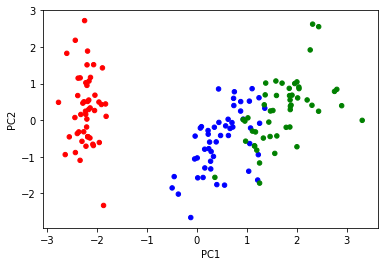

In [159]:
x_pca.plot(kind='scatter', x='PC1', y='PC2',c=y_color)

## IForest
* You do not need the target variable to train the unsupervised learning model.
* We will create three models: clf1, clf2,and clf3
* Model 1: max_samples = 100
* Model 2: max_samples = 80
* Model 3: max_samples = 60
* Suppose your data has 10,000 samples, you can set the max_samples to be anywhere between 100 and 10,000.

#### Model 1

In [165]:
clf1 = IForest(behaviour="new", max_samples=100) 
clf1.fit(X_train)

IForest(behaviour='new', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples=100, n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

* After modeling, there is an anomaly score for each observation in the training dataset X_Train.

In [167]:
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
# We apply the model to the test data X_test to get the outlier scores.
y_test_scores = clf.decision_function(X_test)  # outlier scores
y_test_scores = pd.Series(y_test_scores)
y_test_scores.head()

0   -0.121071
1    0.014994
2    0.080121
3   -0.127331
4   -0.077393
dtype: float64

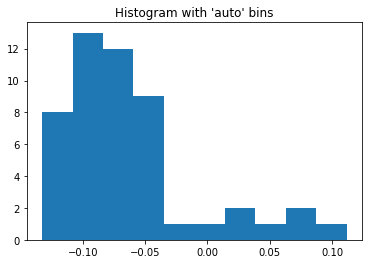

In [168]:
import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

* We will identify the outliers as a cluster and demonstrate the X attributes
* A high anomaly score means more abnormal. We can suggest those >=0.05 to be outliers

In [169]:
X_test_cluster = X_test.copy()
X_test_cluster['distance'] = y_test_scores
X_test_cluster['cluster'] = np.where(X_test_cluster['distance']<0.05, 0, 1)
X_test_cluster['cluster'].value_counts()

1    32
0    18
Name: cluster, dtype: int64

In [170]:
X_test_cluster.groupby('cluster').mean()

,0,1,2,3,distance
cluster,,,,,
0,-0.954534,1.070624,-1.309680,-1.269152,-0.075627
1,0.644209,-0.255122,0.633034,0.634467,0.068978


* We recommend observations in Cluster 1 to be outliers. The average "distance" indicates the distances of those points in Cluster 1. The distance of Cluster 1 is higher than that of Cluster 0, meaning points in Cluster 1 are far away from other points.

#### Model 2

In [171]:
clf2 = IForest(behaviour="new", max_samples=80) 
clf2.fit(X_train)

IForest(behaviour='new', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples=80, n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [172]:
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
y_test_scores = clf2.decision_function(X_test)  # outlier scores
y_test_scores = pd.Series(y_test_scores)
y_test_scores.head()

0   -0.110614
1    0.008593
2    0.066643
3   -0.145365
4   -0.095679
dtype: float64

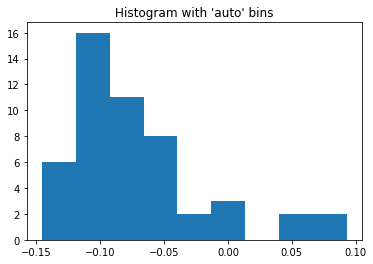

In [173]:
import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [175]:
X_test_cluster = X_test.copy()
X_test_cluster['distance'] = y_test_scores
X_test_cluster['cluster'] = np.where(X_test_cluster['distance']<0.04, 0, 1)
X_test_cluster['cluster'].value_counts()

1    32
0    18
Name: cluster, dtype: int64

In [176]:
X_test_cluster.groupby('cluster').mean()

,0,1,2,3,distance
cluster,,,,,
0,-0.954534,1.070624,-1.309680,-1.269152,-0.084600
1,0.644209,-0.255122,0.633034,0.634467,0.053694


#### Model 3

In [177]:
clf3 = IForest(behaviour="new", max_samples=60) 
clf3.fit(X_train)

IForest(behaviour='new', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples=60, n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [178]:
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
y_test_scores = clf3.decision_function(X_test)  # outlier scores
y_test_scores = pd.Series(y_test_scores)
y_test_scores.head()

0   -0.109891
1    0.005883
2    0.062478
3   -0.137487
4   -0.089750
dtype: float64

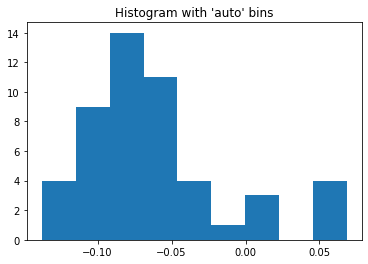

In [179]:
import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [180]:
X_test_cluster = X_test.copy()
X_test_cluster['distance'] = y_test_scores
X_test_cluster['cluster'] = np.where(X_test_cluster['distance']<0.03, 0, 1)
X_test_cluster['cluster'].value_counts()

1    32
0    18
Name: cluster, dtype: int64

In [181]:
X_test_cluster.groupby('cluster').mean()

,0,1,2,3,distance
cluster,,,,,
0,-0.954534,1.070624,-1.309680,-1.269152,-0.075522
1,0.644209,-0.255122,0.633034,0.634467,0.047580


## Achieve Model Stability by Aggregating Multiple Models
* Unsupervised techniques can detect many outliers. But due to its unspervised nature it is not stable, meaning overfitting to a specific dataset.
* The solution is to train multiple models then aggregate the scores. 
* There are four methods to aggregate the outcome:
* (1) Average: average scores of all detectors.
* (2) Maximum of Maximum (MOM)
* (3) Average of Maximum (AOM)
* (4) Maximum of Average (MOA)

In [182]:
from pyod.models.combination import aom, moa, average, maximization
from pyod.utils.utility import standardizer
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

Put all the predictions in a data frame

In [183]:
# The predictions of the training data can be obtained by clf.decision_scores_.
# It is already generated during the model building process.
train_scores = pd.DataFrame({'clf1': clf1.decision_scores_,
                             'clf2': clf2.decision_scores_,
                             'clf3': clf3.decision_scores_
                            })

# The predictions of the test data need to be predicted using clf.decision_function(X_test)
test_scores  = pd.DataFrame({'clf1': clf1.decision_function(X_test),
                             'clf2': clf2.decision_function(X_test),
                             'clf3': clf3.decision_function(X_test) 
                            })

In [184]:
train_scores.head()

,clf1,clf2,clf3
0,-0.136986,-0.144777,-0.140884
1,-0.018147,0.024463,-0.006326
2,-0.129547,-0.131910,-0.116055
3,-0.106639,-0.126283,-0.113708
4,0.003121,0.047627,0.026723


In [185]:
test_scores.head()

,clf1,clf2,clf3
0,-0.108764,-0.110614,-0.109891
1,0.017622,0.008593,0.005883
2,0.062912,0.066643,0.062478
3,-0.129356,-0.145365,-0.137487
4,-0.096087,-0.095679,-0.089750


In [186]:
# Although we did standardization before, it was for the variables.
# Now we do the standardization for the decision scores
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)

In [187]:
train_scores_norm.shape

(100, 3)

### Average
The "average" function in PyOD averages the outlier scores from multiple estimators.
See [PyOD API Reference](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.knn).

In [188]:
# Combination by average
y_by_average = average(test_scores_norm)
y_by_average[1:10]

array([ 1.64124143,  2.70327019, -1.30508702, -0.43726441,  0.63713379,
       -0.61367992,  0.04582805,  0.58061897, -0.8228976 ])

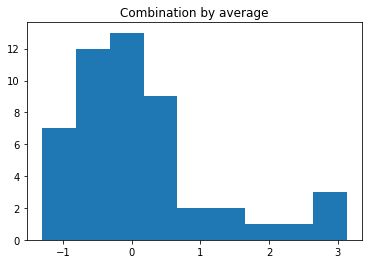

In [189]:
# Combination by average
y_by_average = average(test_scores_norm)
             
import matplotlib.pyplot as plt
plt.hist(y_by_average, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

It appears we can identify those >=2 as the outliers

In [190]:
df_test = pd.DataFrame(X_test)
df_test['y_by_average_score'] = y_by_average
df_test['y_by_average_cluster'] = np.where(df_test['y_by_average_score']<2, 0, 1)
df_test['y_by_average_cluster'].value_counts()

0    46
1     4
Name: y_by_average_cluster, dtype: int64

In [191]:
df_test.groupby('y_by_average_cluster').mean()

,0,1,2,3,y_by_average_score
y_by_average_cluster,,,,,
0,-0.060408,0.131598,-0.144620,-0.124004,-0.093660
1,1.552968,1.263460,0.833841,0.790591,2.758889


### Maximum of maximum

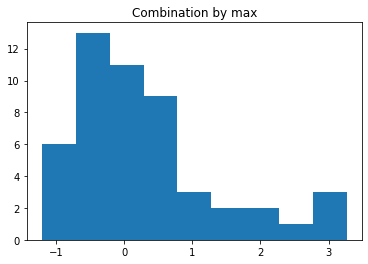

In [192]:
# Combination by max
y_by_maximization = maximization(test_scores_norm)
             
import matplotlib.pyplot as plt
plt.hist(y_by_maximization, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by max")
plt.show()

It appears we can identify those >=2 as the outliers

In [193]:
df_test = pd.DataFrame(X_test)
df_test['y_by_maximization_score'] = y_by_maximization
df_test['y_by_maximization_cluster'] = np.where(df_test['y_by_maximization_score']<2, 0, 1)
df_test['y_by_maximization_cluster'].value_counts()

0    46
1     4
Name: y_by_maximization_cluster, dtype: int64

In [194]:
df_test.groupby('y_by_maximization_cluster').mean()

,0,1,2,3,y_by_average_score,y_by_average_cluster,y_by_maximization_score
y_by_maximization_cluster,,,,,,,
0,-0.060408,0.131598,-0.144620,-0.124004,-0.093660,0,0.033736
1,1.552968,1.263460,0.833841,0.790591,2.758889,1,2.938948
